# Focused Analysis: BPM, Energy, and Danceability

## Analysis Goals
Discover relationships between key song features and popularity:

1. **Core Features**
   - BPM (tempo)
   - Energy levels
   - Danceability

2. **Track Context**
   - Artist patterns
   - Playlist categories
   - Subgenre influences

3. **Success Patterns**
   - What combinations lead to popularity?
   - Genre-specific patterns
   - Artist-specific trends

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8')  # or you can use 'seaborn-darkgrid'
plt.rcParams['figure.figsize'] = [12, 6]

## 1. Data Loading and Feature Selection

Dataset Overview:
Number of tracks: 21199
Number of artists: 9092
Number of subgenres: 24


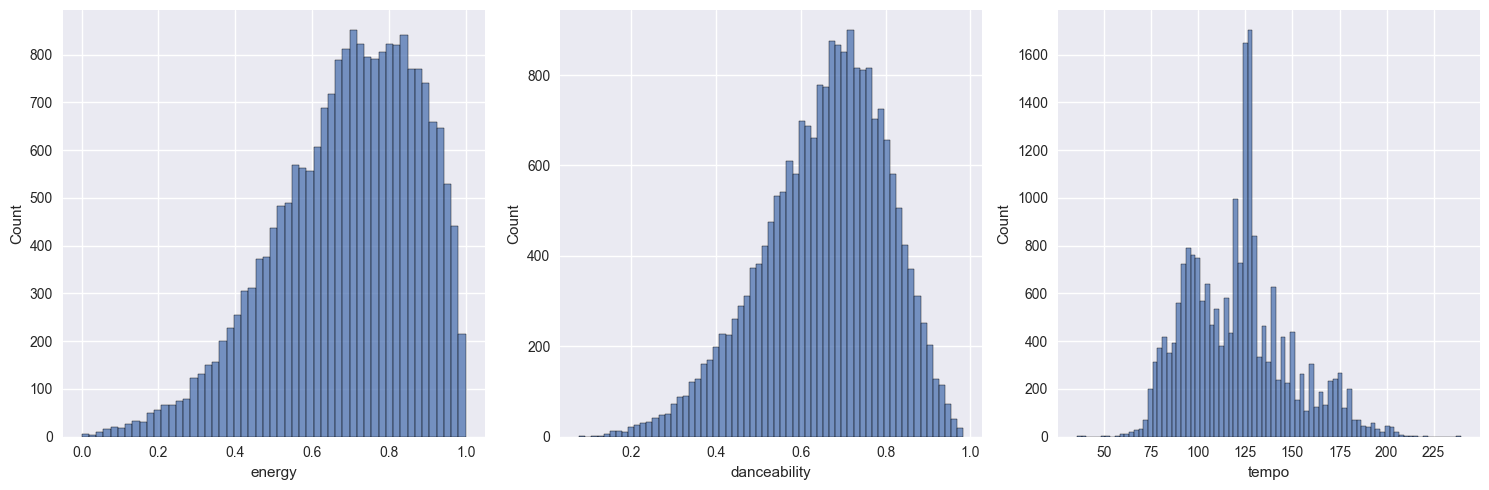

In [4]:
# Load data
sheet_url = "https://docs.google.com/spreadsheets/d/1ae96nZRL_kJWb_EEv2avxMOgGClvyc77SpY-VBqVGiY/edit#gid=1052928543"
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(csv_export_url)

# Select relevant columns
columns = ['track_name', 'track_artist', 'track_popularity',
          'playlist_name', 'playlist_subgenre',
          'energy', 'danceability', 'tempo']

df = df[columns]

# Display basic information
print("Dataset Overview:")
print(f"Number of tracks: {len(df)}")
print(f"Number of artists: {df['track_artist'].nunique()}")
print(f"Number of subgenres: {df['playlist_subgenre'].nunique()}")

# Show feature distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df, x='energy', ax=axes[0])
sns.histplot(data=df, x='danceability', ax=axes[1])
sns.histplot(data=df, x='tempo', ax=axes[2])
plt.tight_layout()
plt.show()

## 2. Feature Relationships

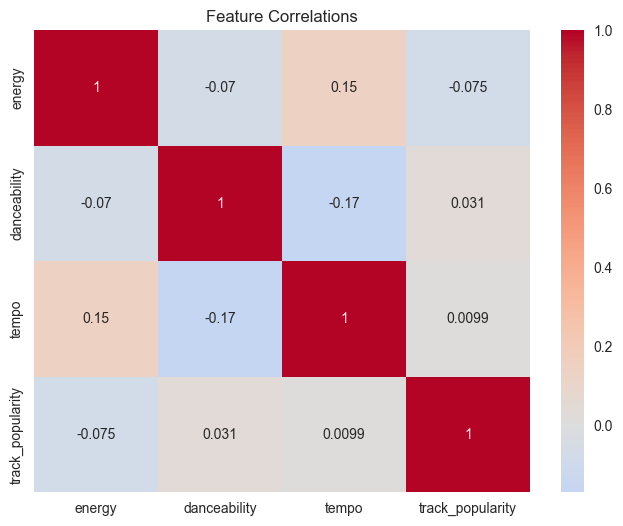

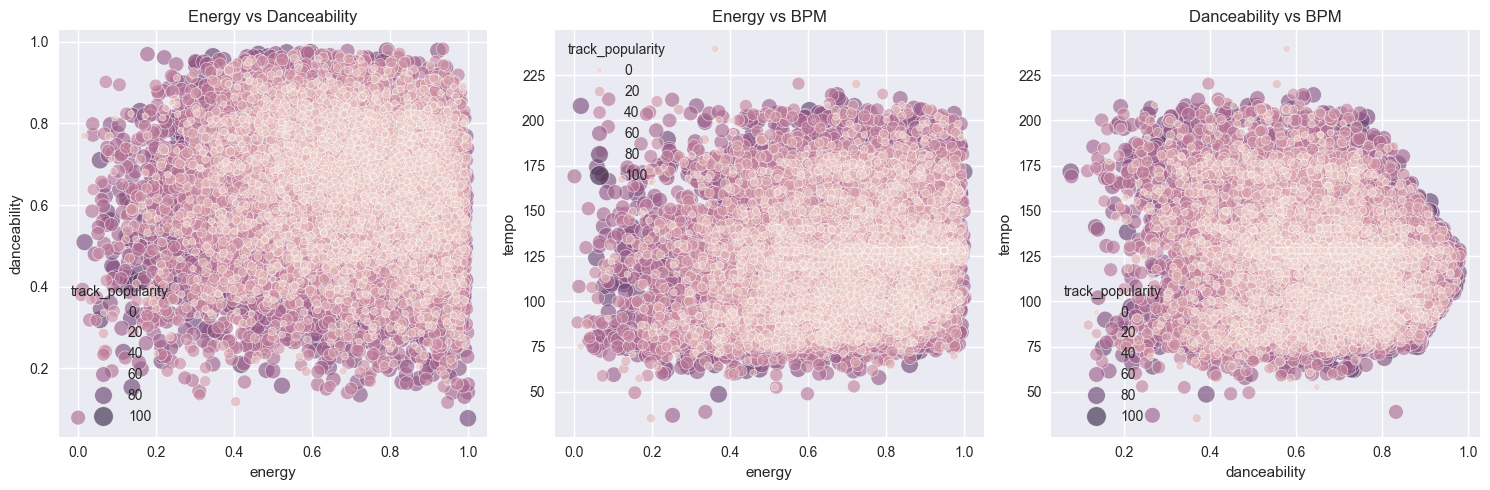

In [5]:
# Create correlation matrix
feature_corr = df[['energy', 'danceability', 'tempo', 'track_popularity']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(feature_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.show()

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Energy vs Danceability
sns.scatterplot(data=df, x='energy', y='danceability', 
                hue='track_popularity', size='track_popularity',
                sizes=(20, 200), alpha=0.6, ax=axes[0])
axes[0].set_title('Energy vs Danceability')

# Energy vs BPM
sns.scatterplot(data=df, x='energy', y='tempo',
                hue='track_popularity', size='track_popularity',
                sizes=(20, 200), alpha=0.6, ax=axes[1])
axes[1].set_title('Energy vs BPM')

# Danceability vs BPM
sns.scatterplot(data=df, x='danceability', y='tempo',
                hue='track_popularity', size='track_popularity',
                sizes=(20, 200), alpha=0.6, ax=axes[2])
axes[2].set_title('Danceability vs BPM')

plt.tight_layout()
plt.show()

## 3. Subgenre Analysis

Top Subgenres by Popularity:
                    track_popularity  energy  danceability   tempo  track_name
playlist_subgenre                                                             
post-teen pop                  60.11    0.71          0.64  123.40         810
reggaeton                      54.84    0.75          0.76  119.98         508
dance pop                      54.82    0.74          0.66  120.42        1070
hip hop                        54.69    0.56          0.72  117.71        1169
permanent wave                 54.45    0.71          0.53  124.65         808
latin pop                      51.93    0.68          0.68  120.64         929
trap                           51.82    0.66          0.72  129.42        1027
urban contemporary             49.84    0.57          0.64  117.08         988
hip pop                        49.72    0.62          0.68  116.62         623
electropop                     47.19    0.71          0.64  122.33         871


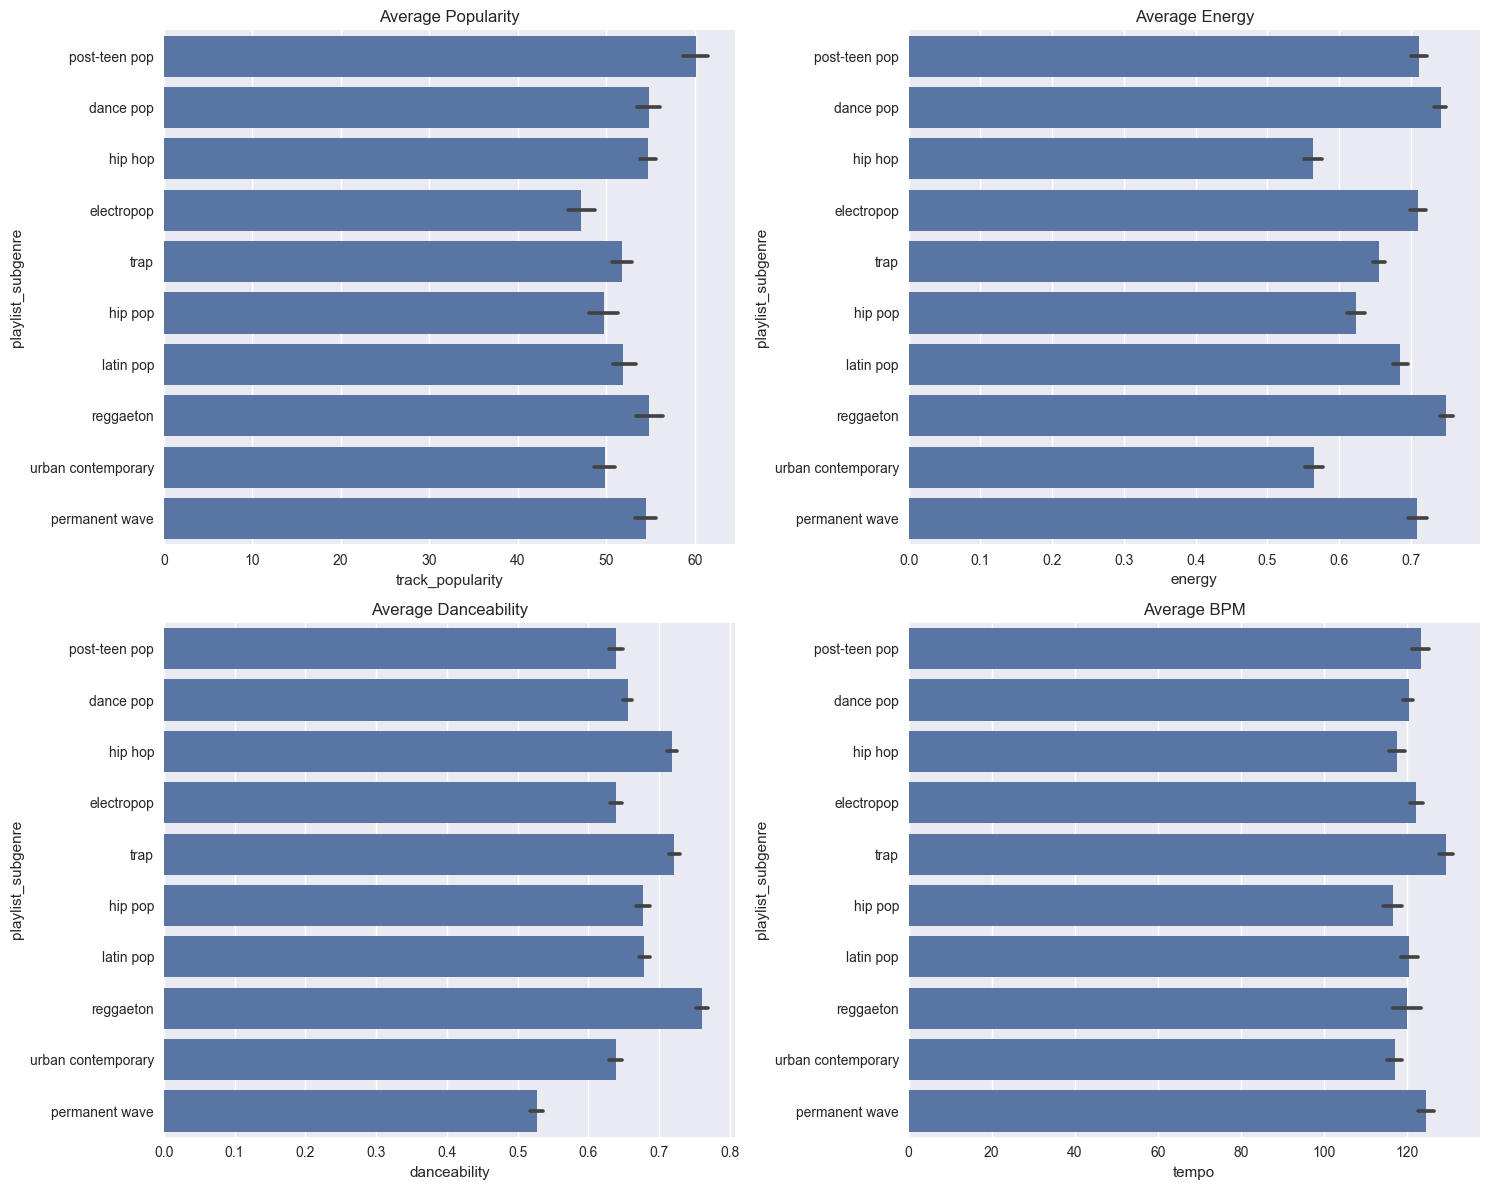

In [6]:
# Calculate subgenre statistics
subgenre_stats = df.groupby('playlist_subgenre').agg({
    'track_popularity': 'mean',
    'energy': 'mean',
    'danceability': 'mean',
    'tempo': 'mean',
    'track_name': 'count'
}).round(2)

subgenre_stats = subgenre_stats.sort_values('track_popularity', ascending=False)

print("Top Subgenres by Popularity:")
print(subgenre_stats.head(10))

# Plot subgenre characteristics
top_subgenres = subgenre_stats.head(10).index
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Popularity
sns.barplot(data=df[df['playlist_subgenre'].isin(top_subgenres)],
            x='track_popularity', y='playlist_subgenre',
            ax=axes[0,0])
axes[0,0].set_title('Average Popularity')

# Energy
sns.barplot(data=df[df['playlist_subgenre'].isin(top_subgenres)],
            x='energy', y='playlist_subgenre',
            ax=axes[0,1])
axes[0,1].set_title('Average Energy')

# Danceability
sns.barplot(data=df[df['playlist_subgenre'].isin(top_subgenres)],
            x='danceability', y='playlist_subgenre',
            ax=axes[1,0])
axes[1,0].set_title('Average Danceability')

# BPM
sns.barplot(data=df[df['playlist_subgenre'].isin(top_subgenres)],
            x='tempo', y='playlist_subgenre',
            ax=axes[1,1])
axes[1,1].set_title('Average BPM')

plt.tight_layout()
plt.show()

## 4. Artist Success Patterns

Top Artists (minimum 3 songs):
              track_popularity       energy danceability   tempo
                          mean count   mean         mean    mean
track_artist                                                    
MEDUZA                   85.33     3   0.71         0.69  124.02
Juice WRLD               85.00     9   0.62         0.65  132.15
JACKBOYS                 84.33     3   0.62         0.75  135.45
Roddy Ricch              84.00     6   0.54         0.85  116.33
DaBaby                   83.67     6   0.69         0.82  126.17
YNW Melly                83.20     5   0.54         0.78  128.00
Camilo                   80.25     4   0.67         0.73  114.26
XXXTENTACION             80.12     8   0.58         0.81  120.14
Alec Benjamin            79.80     5   0.59         0.69  140.46
Lil Tjay                 79.67     3   0.52         0.75  114.05


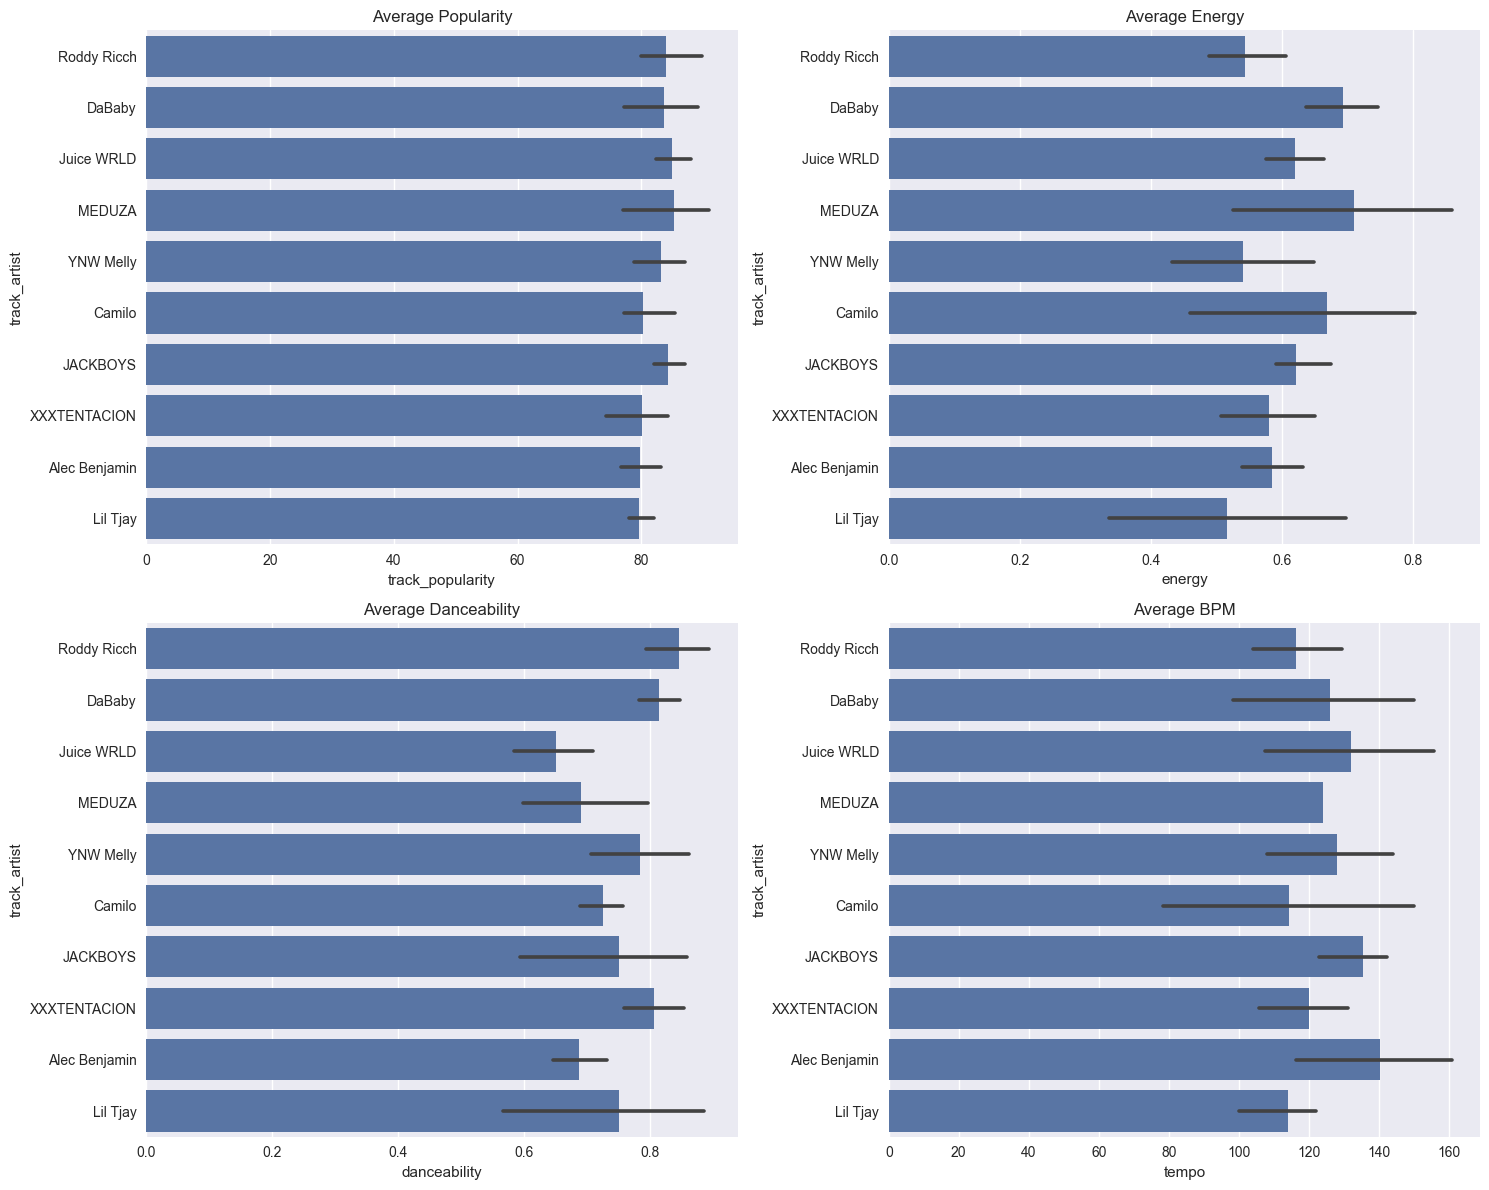

In [7]:
# Find top artists
artist_stats = df.groupby('track_artist').agg({
    'track_popularity': ['mean', 'count'],
    'energy': 'mean',
    'danceability': 'mean',
    'tempo': 'mean'
}).round(2)

# Filter artists with multiple songs
min_songs = 3
artist_stats = artist_stats[artist_stats[('track_popularity', 'count')] >= min_songs]
artist_stats = artist_stats.sort_values(('track_popularity', 'mean'), ascending=False)

print(f"Top Artists (minimum {min_songs} songs):")
print(artist_stats.head(10))

# Plot top artist characteristics
top_artists = artist_stats.head(10).index
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Popularity
sns.barplot(data=df[df['track_artist'].isin(top_artists)],
            x='track_popularity', y='track_artist',
            ax=axes[0,0])
axes[0,0].set_title('Average Popularity')

# Energy
sns.barplot(data=df[df['track_artist'].isin(top_artists)],
            x='energy', y='track_artist',
            ax=axes[0,1])
axes[0,1].set_title('Average Energy')

# Danceability
sns.barplot(data=df[df['track_artist'].isin(top_artists)],
            x='danceability', y='track_artist',
            ax=axes[1,0])
axes[1,0].set_title('Average Danceability')

# BPM
sns.barplot(data=df[df['track_artist'].isin(top_artists)],
            x='tempo', y='track_artist',
            ax=axes[1,1])
axes[1,1].set_title('Average BPM')

plt.tight_layout()
plt.show()

## 5. Success Formula Analysis

Optimal Ranges for Hit Songs:
Energy: 0.68 ± 0.17
Danceability: 0.66 ± 0.15
Tempo: 121.71 ± 28.39


/var/folders/db/p_l2mn4n2fz08wy9nbf2kz000000gn/T/ipykernel_89915/1656310824.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_matrix = df.groupby([energy_bins, dance_bins])['track_popularity'].agg([
/var/folders/db/p_l2mn4n2fz08wy9nbf2kz000000gn/T/ipykernel_89915/1656310824.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


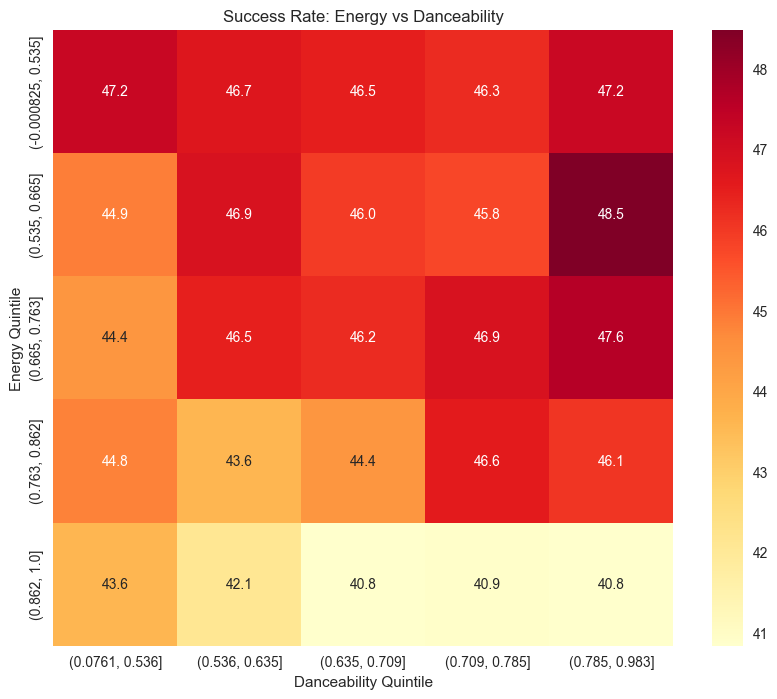


Most Successful Feature Combinations:
                               Avg Popularity  Hit Rate %
energy         danceability                              
(0.535, 0.665] (0.785, 0.983]           48.48       32.66
(0.665, 0.763] (0.785, 0.983]           47.62       30.61
               (0.709, 0.785]           46.87       30.36
(0.535, 0.665] (0.536, 0.635]           46.85       29.34
(0.763, 0.862] (0.709, 0.785]           46.56       29.20


In [8]:
# Define popularity thresholds
high_popularity = df['track_popularity'].quantile(0.75)
hit_songs = df[df['track_popularity'] >= high_popularity]

# Calculate optimal ranges
print("Optimal Ranges for Hit Songs:")
for feature in ['energy', 'danceability', 'tempo']:
    mean = hit_songs[feature].mean()
    std = hit_songs[feature].std()
    print(f"{feature.capitalize()}: {mean:.2f} ± {std:.2f}")

# Create success rate heatmap
energy_bins = pd.qcut(df['energy'], q=5)
dance_bins = pd.qcut(df['danceability'], q=5)

success_matrix = df.groupby([energy_bins, dance_bins])['track_popularity'].agg([
    'mean',
    lambda x: (x >= high_popularity).mean() * 100
]).round(2)
success_matrix.columns = ['Avg Popularity', 'Hit Rate %']

# Plot heatmap
plt.figure(figsize=(10, 8))
pivot_table = df.pivot_table(
    values='track_popularity',
    index=energy_bins,
    columns=dance_bins,
    aggfunc='mean'
)

sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Success Rate: Energy vs Danceability')
plt.xlabel('Danceability Quintile')
plt.ylabel('Energy Quintile')
plt.show()

# Print top combinations
print("\nMost Successful Feature Combinations:")
print(success_matrix.sort_values('Hit Rate %', ascending=False).head())